Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)   │ (None, 30, 7)             │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ lstm_10 (LSTM)                │ (None, 30, 64)            │          18,432 │ input_layer_10[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_57 (Conv1D)            │ (None, 30, 64)            │          12,352 │ lstm_10[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_58 (Conv1D)            │ (None, 30, 64)            │           8,256 │ conv1d_57[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_59 (Conv1D)            │ (None, 30, 64)            │           4,160 │ conv1d_58[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add_19 (Add)                  │ (None, 30, 64)            │               0 │ lstm_10[0][0],             │
│                               │                           │                 │ conv1d_59[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_60 (Conv1D)            │ (None, 30, 64)            │          12,352 │ add_19[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_61 (Conv1D)            │ (None, 30, 64)            │           8,256 │ conv1d_60[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1d_62 (Conv1D)            │ (None, 30, 64)            │           4,160 │ conv1d_61[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add_20 (Add)                  │ (None, 30, 64)            │               0 │ add_19[0][0],              │
│                               │                           │                 │ conv1d_62[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten_9 (Flatten)           │ (None, 1920)              │               0 │ add_20[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_9 (Dropout)           │ (None, 1920)              │               0 │ flatten_9[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_9 (Dense)               │ (None, 1)                 │           1,921 │ dropout_9[0][0]            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 69,889 (273.00 KB)

 Trainable params: 69,889 (273.00 KB)

 Non-trainable params: 0 (0.00 B)

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Chỉ số đánh giá với tỷ lệ test size 0.3:
MAPE: 60.49%
RMSE: 35.56
MAE: 25.06


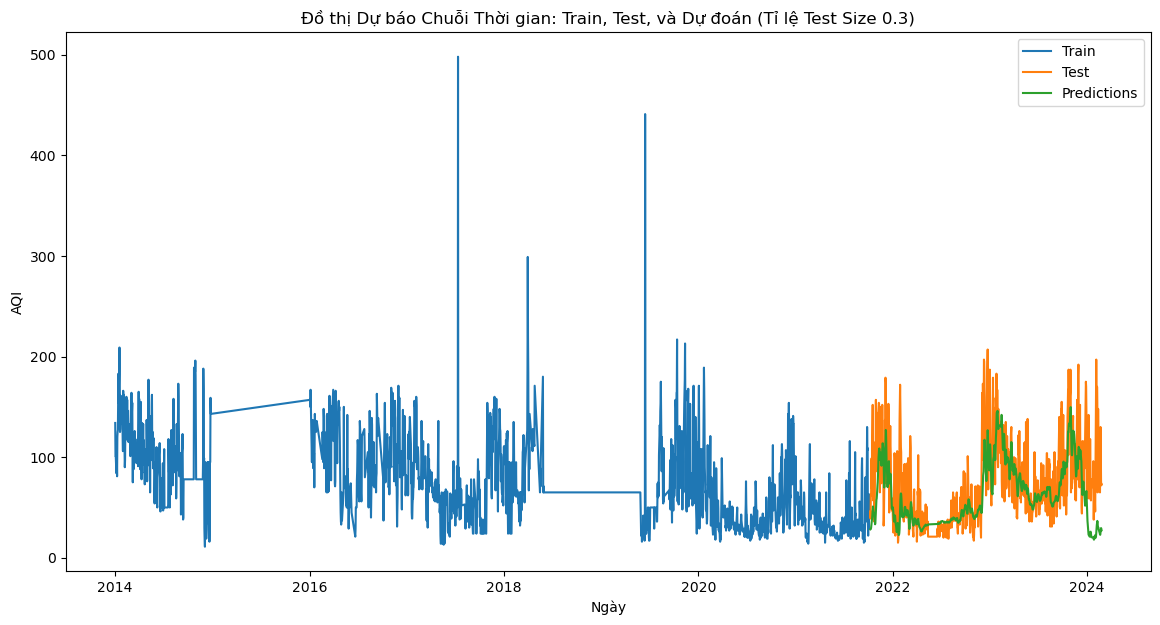

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Chỉ số đánh giá với tỷ lệ test size 0.2:
MAPE: 75.23%
RMSE: 35.66
MAE: 28.77


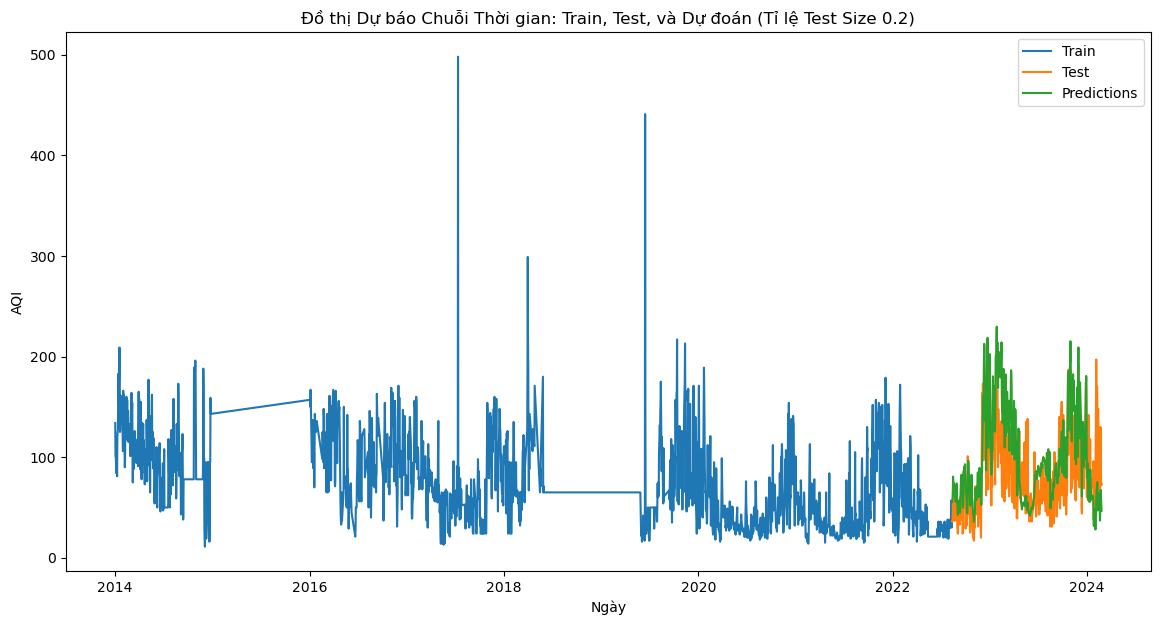

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Chỉ số đánh giá với tỷ lệ test size 0.1:
MAPE: 44.75%
RMSE: 22.70
MAE: 15.45


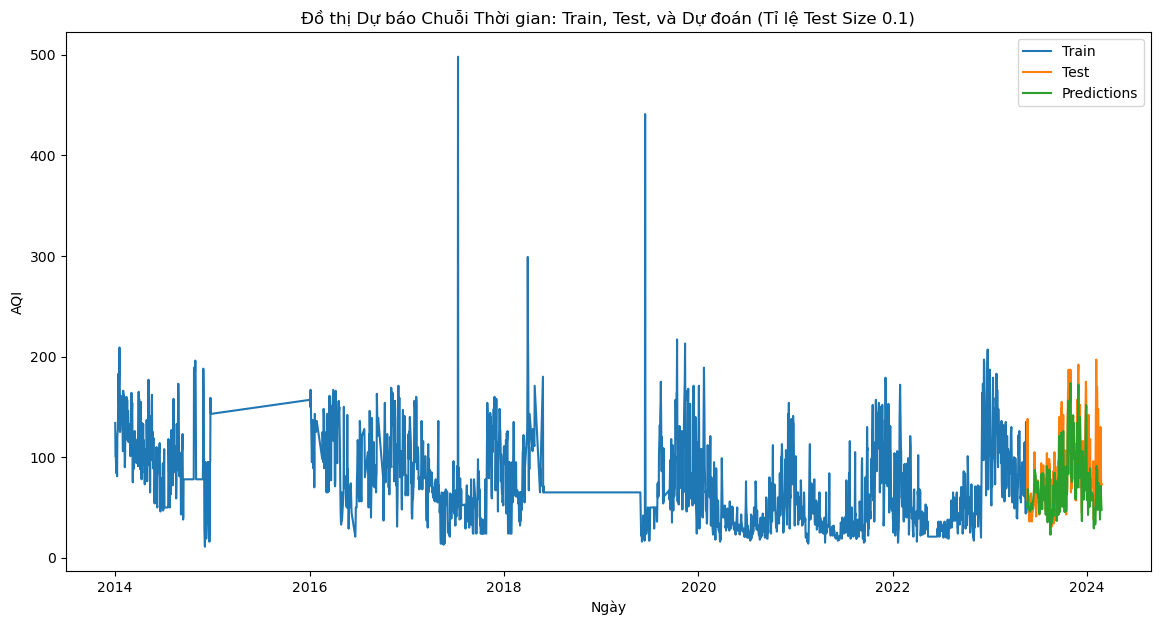

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Conv1D, Add, Flatten, Dropout, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load dữ liệu
df = pd.read_csv(r'C:\Users\ASUS\Desktop\ptdl\HaNoi.csv', index_col='date', parse_dates=True)

# Giả sử 'AQI' là biến mục tiêu
target = 'AQI'

# Các đặc trưng là tất cả các cột ngoại trừ biến mục tiêu
features = df.columns[df.columns != target]

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
    
# Số lượng đặc trưng
num_features = len(features)

# Chuẩn bị dữ liệu cho LSTM
def create_sequences(data, target_col, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data.iloc[i:i+window_size][features].values)
        y.append(data.iloc[i+window_size][target_col])
    return np.array(X), np.array(y)

# Siêu tham số
window_size = 30  # Số ngày trước đó cần xem xét

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

# Tạo chuỗi
X, y = create_sequences(df, target, window_size)

# Reshape X thành (samples, timesteps, num_features)
X = X.reshape(X.shape[0], X.shape[1], num_features)

# Xây dựng mô hình LSTM-resCNN
input_layer = Input(shape=(window_size, num_features))
x = LSTM(64, return_sequences=True)(input_layer)

# Khối CNN đầu tiên
cnn1 = Conv1D(64, kernel_size=3, strides=1, padding='same', activation='relu')(x)
cnn1 = Conv1D(64, kernel_size=2, strides=1, padding='same', activation='relu')(cnn1)
cnn1 = Conv1D(64, kernel_size=1, strides=1, padding='same', activation='relu')(cnn1)
res1 = Add()([x, cnn1])

# Khối CNN thứ hai
cnn2 = Conv1D(64, kernel_size=3, strides=1, padding='same', activation='relu')(res1)
cnn2 = Conv1D(64, kernel_size=2, strides=1, padding='same', activation='relu')(cnn2)
cnn2 = Conv1D(64, kernel_size=1, strides=1, padding='same', activation='relu')(cnn2)
res2 = Add()([res1, cnn2])

# Lớp Flatten và Dense
x = Flatten()(res2)
x = Dropout(0.5)(x)
output_layer = Dense(1, activation='linear')(x)  # Kích hoạt tuyến tính cho hồi quy

# Định nghĩa mô hình
model = Model(inputs=input_layer, outputs=output_layer)

# Biên dịch mô hình
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])  # 'mae' là sai số tuyệt đối trung bình

# In tóm tắt mô hình
model.summary()

# Phân chia train-test với các tỷ lệ test_size khác nhau
test_sizes = [0.3, 0.2, 0.1]

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)

    # Huấn luyện mô hình
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)

    # Dự đoán
    predictions = model.predict(X_test)

    # Tính các chỉ số đánh giá
    mape = mean_absolute_percentage_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    mae = mean_absolute_error(y_test, predictions)
    print(f'Chỉ số đánh giá với tỷ lệ test size {test_size}:')
    print(f'MAPE: {mape:.2f}%')
    print(f'RMSE: {rmse:.2f}')
    print(f'MAE: {mae:.2f}')

    # Trực quan hóa train, test và dự đoán
    plt.figure(figsize=(14, 7))
    plt.plot(df.index[:len(y_train)], y_train, label='Train')
    plt.plot(df.index[len(y_train):len(y_train) + len(y_test)], y_test, label='Test')
    plt.plot(df.index[len(y_train):len(y_train) + len(y_test)], predictions, label='Predictions')
    plt.xlabel('Ngày')
    plt.ylabel('AQI')
    plt.title(f'Đồ thị Dự báo Chuỗi Thời gian: Train, Test, và Dự đoán (Tỉ lệ Test Size {test_size})')
    plt.legend()
    plt.show()
